In [1]:
import polars as pl

dataset = pl.read_csv("../test_data/resin.csv")
dataset.drop_in_place(dataset.columns[0])
print(dataset)

shape: (20, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64            ┆ f64            ┆ i64         ┆ i64  │
╞══════════╪════════════════╪════════════════╪════════════════╪═════════════╪══════╡
│ 0.125    ┆ 0.5            ┆ 0.1            ┆ 0.4            ┆ 85          ┆ 80   │
│ 0.122    ┆ 0.7            ┆ 0.0            ┆ 0.3            ┆ 55          ┆ 50   │
│ 0.624    ┆ 0.0            ┆ 0.2            ┆ 0.8            ┆ 70          ┆ 40   │
│ 0.042    ┆ 0.9            ┆ 0.1            ┆ 0.0            ┆ 60          ┆ 90   │
│ 0.589    ┆ 0.2            ┆ 0.0            ┆ 0.8            ┆ 75          ┆ 120  │
│ …        ┆ …              ┆ …              ┆ …              ┆ …           ┆ …    │
│ 0.087    ┆ 0.5            ┆ 0.3            ┆ 0.2

Text(0, 0.5, 'frequency')

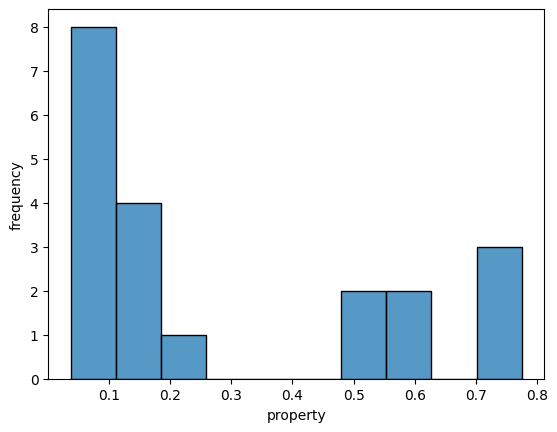

In [2]:
# 3.2 ヒストグラム
import seaborn as sns

var = "property"  # ヒストグラムを作成する変数名
number_of_bins = 10

axes = sns.histplot(
    data=dataset, x="property", bins=number_of_bins
)  # ヒストグラムの作成
axes.set_xlabel(var)  # 横軸の名前
axes.set_ylabel("frequency")  # 縦軸の名前

Text(0, 0.5, 'raw material 1')

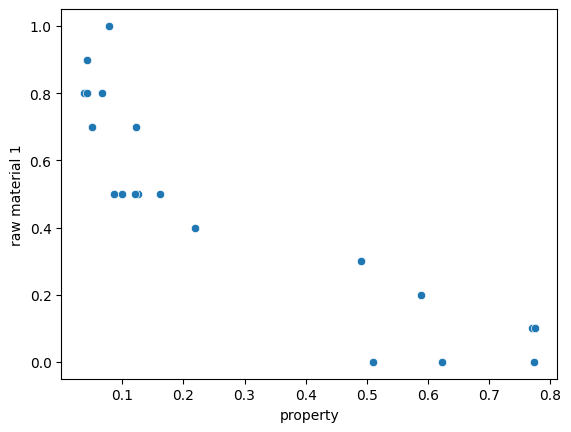

In [3]:
# 3.2 散布図

var_x = "property"  # 縦軸の変数名
var_y = "raw material 1"  # 横軸の変数名

axes = sns.scatterplot(dataset, x="property", y="raw material 1")  # 散布図の作成
axes.set_xlabel(var_x)  # 横軸の名前。ここでは、variable_number_1 番目の列の名前
axes.set_ylabel(var_y)  # 縦軸の名前。ここでは、variable_number_2 番目の列の名前

In [4]:
# 3.3 統計量の確認
stat_data = dataset.describe()
stat_data.write_csv("../output/resin_statistics.csv")
stat_data

statistic,property,raw material 1,raw material 2,raw material 3,temperature,time
str,f64,f64,f64,f64,f64,f64
"""count""",20.0,20.0,20.0,20.0,20.0,20.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.28925,0.465,0.12,0.415,72.25,55.5
"""std""",0.282036,0.319992,0.115166,0.328113,16.260624,35.015034
"""min""",0.037,0.0,0.0,0.0,50.0,10.0
"""25%""",0.079,0.2,0.0,0.1,60.0,40.0
"""50%""",0.125,0.5,0.1,0.3,70.0,50.0
"""75%""",0.511,0.7,0.2,0.7,85.0,80.0
"""max""",0.775,1.0,0.4,0.9,100.0,120.0


In [11]:
cov_data = dataset.select(
    [
        [pl.cov(col1, col2).alias(f"cov_{col1}") for col2 in dataset.columns]
        for col1 in dataset.columns
    ]
)
cov_data = pl.DataFrame(
    {
        col1: [pl.cov(col1, col2).to_physical() for col2 in dataset.columns]
        for col1 in dataset.columns
    }
)
cov_data.write_csv("../output/resin_covariance.csv")
print(cov_data)

corr_data = dataset.corr().insert_column(0, pl.Series("index", dataset.columns))
corr_data.write_csv("../output/resin_correlation_coefficient.csv")
print(corr_data)

TypeError: not yet implemented: Nested object types

Hint: Try setting `strict=False` to allow passing data with mixed types.